# Tries (Prefix Trees)
Tries = re**trie**val

Tree structure in which elements are represented by **paths**.

Basic functions a Trie must have:
- Insert a word into a trie
- Search if a word exists in a trie
- Check if a prefix exists in a trie

In [34]:
# Fonte: https://wangyy395.medium.com/implement-a-trie-in-python-e8dd5c5fde3a

class TrieNode:
    def __init__(self):
        self.children = [None] * 26
        self.isLeaf = False

class Trie:
    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.root = TrieNode()

    def insert(self, word: str) -> None:
        """
        Inserts a word into the trie.
        """
        current = self.root 
        for letter in word:
            index = ord(letter) - ord('a')
            if not current.children[index]:
                current.children[index] = TrieNode()
            current = current.children[index]
        current.isLeaf = True

    def search(self, word: str) -> bool:
        """
        Returns if the word is in the trie.
        """
        current = self.root 
        for letter in word:
            index = ord(letter) - ord('a')
            if not current.children[index]:
                return False 
            current = current.children[index]
        return current.isLeaf and current
    
    def startsWith(self, prefix: str) -> bool:
        """
        Returns if there is any word in the trie that starts with the given prefix.
        """
        current = self.root 
        for letter in prefix:
            index = ord(letter) - ord('a')
            if not current.children[index]:
                return False
            current = current.children[index]
        return True

In [35]:
# Create an instance of the Trie
trie = Trie()

# Insert words into the trie
words_to_insert = ["apple", "app", "banana", "bat", "bath", "batman"]

for word in words_to_insert:
    trie.insert(word)

# Optional: Test the insertion by searching for some words
print(trie.search("apple"))  # Output: True
print(trie.search("app"))    # Output: True
print(trie.search("banana")) # Output: True
print(trie.search("bat"))    # Output: True
print(trie.search("bath"))   # Output: True
print(trie.search("batman")) # Output: True

print(trie.search("appl"))   # Output: False (appl is not a word in the trie)
print(trie.startsWith("bat")) # Output: True (there are words starting with "bat")
print(trie.startsWith("ban")) # Output: True (there are words starting with "ban")
print(trie.startsWith("cat")) # Output: False (no words starting with "cat")

False
True
True
False


## My version of Trie

In [197]:
# Fonte: Modificação de https://wangyy395.medium.com/implement-a-trie-in-python-e8dd5c5fde3a

from graphviz import Digraph

class TrieNode:
    def __init__(self):
        """
        Initialize a TrieNode object.
        """
        self.children = [None] * 26
        self.isLeaf = False

class Trie:
    def __init__(self):
        """
        Initialize a Trie data structure.
        """
        self.root = TrieNode()



    ### Operation: Insertion ###
    def insert(self, word: str) -> None:
        """
        Inserts a word into the trie.

        Parameters:
            word (str): The word to insert into the trie.

        Returns:
            None
        """
        if not word.islower():
            raise ValueError("Invalid input: Word must consist only of lowercase letters.")
        
        current = self.root 
        for letter in word:
            index = ord(letter) - ord('a')
            if not current.children[index]:
                current.children[index] = TrieNode()
            current = current.children[index]
        current.isLeaf = True

    def insert_fromList(self, words: list) -> None:
        """
        Inserts a list of words into the trie.

        Parameters:
            words (list): A list of words to insert into the trie.

        Returns:
            None
        """
        for word in words:
            self.insert(word)

    def insert_fromInput(self) -> None:
        """
        Inserts words into the trie based on user input.

        Displays the number of total inputs and remaining inputs.

        Returns:
            None
        """
        try:
            num_words = int(input("Specify number of words to insert: "))
            for i in range(1, num_words + 1):
                word = input(f"Input word ({i} out of {num_words} inputs remaining): ")
                self.insert(word)
        except ValueError:
            print("Invalid input: Number of words must be an integer.")



    ### Operation: Deletion ###
    def delete(self, word: str) -> None:
        """
        Deletes a specified existing word from the trie.

        Parameters:
            word (str): The word to delete from the trie.

        Returns:
            None
        """
        # First, we need to check if the word exists in the trie
        if not self.search(word):
            raise ValueError(f"Deletion Failed: Input word '{word}' is not present in the Trie!")

        # Remaining deletion logic...
        current = self.root
        nodes_to_delete = []  # To store nodes that need to be deleted
        
        for letter in word:
            index = ord(letter) - ord('a')
            current = current.children[index]
            nodes_to_delete.append((current, index))

        # Mark the node corresponding to the last character of the word as not a leaf node
        current.isLeaf = False

        # Traverse back from the last character node towards the root and delete nodes that are not part of any other words
        while nodes_to_delete:
            node, index = nodes_to_delete.pop()
            if not any(node.children):
                parent_node, parent_index = nodes_to_delete[-1] if nodes_to_delete else (self.root, None)
                parent_node.children[parent_index] = None
            elif node.isLeaf:
                break

        print(f"Input word '{word}' was deleted from Trie successfully!")

    def delete_fromList(self, words: list) -> None:
        """
        Deletes a list of words from the trie.

        Parameters:
            words (list): A list of words to delete from the trie.

        Returns:
            None
        """
        for word in words:
            if self.search(word):
                self.delete(word)
            else:
                print(f"Deletion Failed: Input word '{word}' is not present in the Trie!")



    ### Operation: Searching ###
    def search(self, word: str) -> bool:
        """
        Returns if the word is in the trie.

        Parameters:
            word (str): The word to search for in the trie.

        Returns:
            bool: True if the word is in the trie, False otherwise.
        """
        current = self.root 
        for letter in word:
            index = ord(letter) - ord('a')
            if not current.children[index]:
                return False
            current = current.children[index]
        return current.isLeaf
    
    def search_fromList(self, words: list) -> dict:
        """
        Searches each word from the input list in the trie.

        Parameters:
            words (list): A list of words to search for in the trie.

        Returns:
            dict: A dictionary containing each word from the input list
                  as keys and their existence in the trie as values.
        """
        result = {}
        for word in words:
            result[word] = self.search(word)
        return result
    
    def search_fromInput(self) -> tuple:
        """
        Searches for words in the trie based on user input.
        Empty input or pressing the Escape key ends the input action, all the input words will be searched.

        Returns:
            tuple: A tuple containing two lists:
                - A list of words found in the trie.
                - A list of words not found in the trie.
        """
        found_words = []
        not_found_words = []

        while True:
            word = input("Input word to search (Press 'Enter' on an empty input to stop): ")
            if not word:
                break
            if self.search(word):
                found_words.append(word)
            else:
                not_found_words.append(word)

        print(f"Words found in Trie: {found_words}\nWords NOT found in Trie: {not_found_words}")
        return found_words, not_found_words
    
    def startsWith(self, prefix: str) -> bool:
        """
        Returns if there is any word in the trie that starts with the given prefix.

        Parameters:
            prefix (str): The prefix to search for in the trie.

        Returns:
            bool: True if there is any word in the trie that starts with the given prefix, False otherwise.
        """
        current = self.root 
        for letter in prefix:
            index = ord(letter) - ord('a')
            if not current.children[index]:
                return False
            current = current.children[index]
        return True

    def _collectAllWords(self, node: TrieNode, path: str, words: list) -> None:
        """
        Helper function to collect all words in the trie.

        Parameters:
            node (TrieNode): The current node being traversed.
            path (str): The current path of letters from the root to the current node.
            words (list): A list to collect all words found in the trie.

        Returns:
            None
        """
        if node.isLeaf:
            words.append(path)
        
        for index in range(26):
            if node.children[index] is not None:
                self._collectAllWords(node.children[index], path + chr(index + ord('a')), words)

    def getAllWords(self) -> list:
        """
        Returns all words stored in the trie.

        Returns:
            list: A list of all words stored in the trie.
        """
        words = []
        self._collectAllWords(self.root, "", words)
        return words
    
    def get_all_nodes(self) -> list:
        """
        Returns a list of all nodes in the trie.

        Returns:
            list: A list containing all nodes in the trie.
        """
        all_nodes = []

        # Helper function to perform DFS traversal
        def dfs(node):
            if node is None:
                return
            all_nodes.append(node)
            for child in node.children:
                dfs(child)

        dfs(self.root)
        return all_nodes
    
    def observeNodes(self, dot) -> None:
        """
        Observes all trie nodes along with the words they represent and their identifiers.

        Parameters:
            dot: The Digraph object from Graphviz used to represent the trie nodes.

        Returns:
            None
        """
        queue = [(self.root, "")]
        while queue:
            node, word = queue.pop(0)
            if node.isLeaf:
                dot.node(str(id(node)), label=f"{word}", shape='doublecircle')
            else:
                dot.node(str(id(node)), label=f"{word}")
            for i, child in enumerate(node.children):
                if child is not None:
                    queue.append((child, word + chr(i + ord('a'))))
                    dot.edge(str(id(node)), str(id(child)), label=chr(i + ord('a')))



    ### Operation: Visualization ###
    def visualize(self, filename=None):
        """
        Visualizes the trie using Graphviz and optionally saves the image as a PNG file.

        Parameters:
            filename (str, optional): If provided, saves the visualization as a PNG file with the given filename.
                If not provided, the visualization is displayed in the python notebook.

        Returns:
            None
        """
        dot = Digraph(comment='Trie')
        self.observeNodes(dot)
        if filename: 
            dot.render(filename, format='png', cleanup=True)
        else:
            display(dot)

In [198]:
# Example usage:
trie = Trie()

trie.insert_fromList(["apple", "app", "road"])

In [199]:
trie.search_fromInput()

Words found in Trie: ['apple']
Words NOT found in Trie: []


In [185]:
trie.getAllWords()

['app', 'apple', 'road']

In [177]:
trie.insert_fromInput()

In [181]:
trie.delete_fromList(["apple", "app"])

Deletion Failed: Input word 'apple' is not present in the Trie!
Deletion Failed: Input word 'app' is not present in the Trie!


In [54]:
# Create an instance of the Trie
trie = Trie()

trie.insert("dog")

In [182]:
trie.search("apple")

False

In [56]:
trie = Trie()
trie.insert_fromList(["dog", "leg", "apple", "boat", "do"])

In [59]:
trie = Trie()

trie.insert_fromInput()

In [122]:
# Example usage:
trie = Trie()

trie.insert_fromList(["apple", "app"])

In [138]:
# Example usage:
trie = Trie()

trie.insert_fromList(["apple", "app", "banana", "bat", "bath", "batman"])

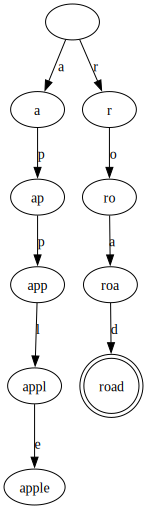

In [173]:
trie.visualize()

In [150]:
trie.delete_unused_nodes()

In [151]:
trie.get_all_nodes()

In [147]:
trie.delete("apple")  # Example of deleting a single word

Input word 'apple' was deleted from Trie successfully!


In [136]:
trie.getAllWords()

[]

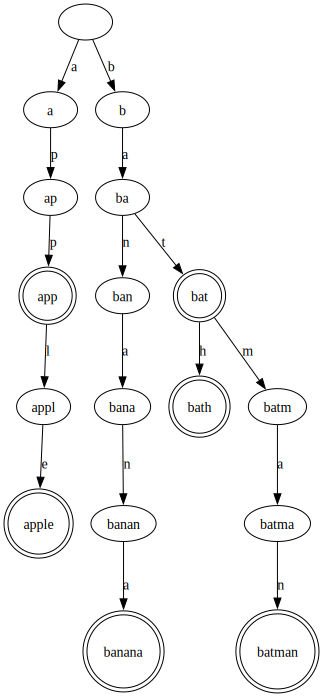

In [83]:
# Example usage:
trie = Trie()

trie.insert_fromList(["apple", "app", "banana", "bat", "bath", "batman"])

trie.visualize()

In [63]:
# # Example usage:
# trie = Trie()
# words_to_insert = ["apple", "app", "banana", "bat", "bath", "batman"]

# for word in words_to_insert:
#     trie.insert(word)

trie.getAllWords()

['app', 'apple', 'banana', 'bat', 'bath', 'batman']